# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [14]:
type(data.columns)

pandas.core.indexes.base.Index

### Data Type Conversions

In [15]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [43]:
data

numpy.int64

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [44]:
data.Release_Date = pd.to_datetime(data.Release_Date)
type(data.Release_Date[0])
clean_data = data
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [98]:
avg_production = clean_data.USD_Production_Budget.mean()
print(avg_production)
avg_worldwide = clean_data.USD_Worldwide_Gross.mean()
print(avg_worldwide)
min_world = clean_data.USD_Worldwide_Gross.min()
print(min_world)
max_world = clean_data.USD_Worldwide_Gross.min()
print(max_world)
min_domestic = clean_data.USD_Domestic_Gross.min()
print(min_domestic)
max_dosmestic = clean_data.USD_Domestic_Gross.max()
print(max_dosmestic)
profit = clean_data.USD_Domestic_Gross + clean_data.USD_Worldwide_Gross - clean_data.USD_Production_Budget
clean_data["Profit"]  = profit
percentage = 25/100
rows = int(clean_data.shape[0] * percentage)
clean_data.tail(rows)
highest_bgt = clean_data.USD_Production_Budget.max()
print(highest_bgt)
highest_rev = clean_data.USD_Worldwide_Gross.max()
print(highest_rev)
lowest_bgt = clean_data.USD_Production_Budget.min()
highest_bgt_rev = clean_data[["Movie_Title" ,"USD_Worldwide_Gross", "USD_Production_Budget", "Profit"]][clean_data.USD_Production_Budget == highest_bgt]
lowest_bgt_rev = clean_data[["Movie_Title" ,"USD_Worldwide_Gross", "USD_Production_Budget", "Profit"]][clean_data.USD_Production_Budget == lowest_bgt]
# lowest_bgt_rev
highest_bgt_rev

31113737.57837136
88855421.96271564
0
0
0
936662225
425000000
2783918982


,Movie_Title,USD_Worldwide_Gross,USD_Production_Budget,Profit
3529,Avatar,2783918982,425000000,3119426607


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [105]:
zero_rev_films_dm = clean_data[["Movie_Title", "USD_Production_Budget"]][clean_data.USD_Domestic_Gross == 0].sort_values("USD_Production_Budget" ,ascending=False)
zero_rev_films_dm

,Movie_Title,USD_Production_Budget
5388,Singularity,175000000
5387,Aquaman,160000000
5384,A Wrinkle in Time,103000000
5385,Amusement Park,100000000
5090,"Don Gato, el inicio de la pandilla",80000000
...,...,...
4787,Stories of Our Lives,15000
3056,Tin Can Man,12000
4907,Family Motocross,10000
5006,Signed Sealed Delivered,5000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [106]:
zero_rev_films_int = clean_data[["Movie_Title", "USD_Production_Budget"]][clean_data.USD_Worldwide_Gross == 0].sort_values("USD_Production_Budget" ,ascending=False)
zero_rev_films_int

,Movie_Title,USD_Production_Budget
5388,Singularity,175000000
5387,Aquaman,160000000
5384,A Wrinkle in Time,103000000
5385,Amusement Park,100000000
5058,The Ridiculous 6,60000000
...,...,...
4787,Stories of Our Lives,15000
3056,Tin Can Man,12000
4907,Family Motocross,10000
5006,Signed Sealed Delivered,5000


### Filtering on Multiple Conditions

In [107]:
inter_releases_loc = clean_data.loc[(clean_data.USD_Worldwide_Gross != 0) & (clean_data.USD_Domestic_Gross == 0)]
inter_releases_loc

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [111]:
inter_releases_query = clean_data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")
inter_releases_query

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [113]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [122]:
unreleased_films = clean_data[clean_data.Release_Date > scrape_date]
unreleased_films.value_counts()

Rank  Release_Date  Movie_Title                     USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Profit    
96    2020-12-31    Singularity                     175000000              0                    0                   -175000000    1
126   2018-12-18    Aquaman                         160000000              0                    0                   -160000000    1
321   2018-09-03    A Wrinkle in Time               103000000              0                    0                   -103000000    1
366   2018-10-08    Amusement Park                  100000000              0                    0                   -100000000    1
1119  2020-12-31    Hannibal the Conqueror          50000000               0                    0                   -50000000     1
2517  2020-12-31    Story of Bonnie and Clyde, The  20000000               0                    0                   -20000000     1
2950  2018-10-08    Meg                             15000000               0     

In [128]:
clean_data.drop(unreleased_films.index, inplace=True)
clean_data.shape

KeyError: '[5384, 5385, 5386, 5387, 5388, 5389, 5390] not found in axis'

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [180]:
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,20890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000


In [154]:
money_losing = clean_data.query("USD_Production_Budget > USD_Worldwide_Gross")
money_losing_per = (money_losing.shape[0]/clean_data.shape[0]) * 100
print(money_losing_per)

37.27711738484398


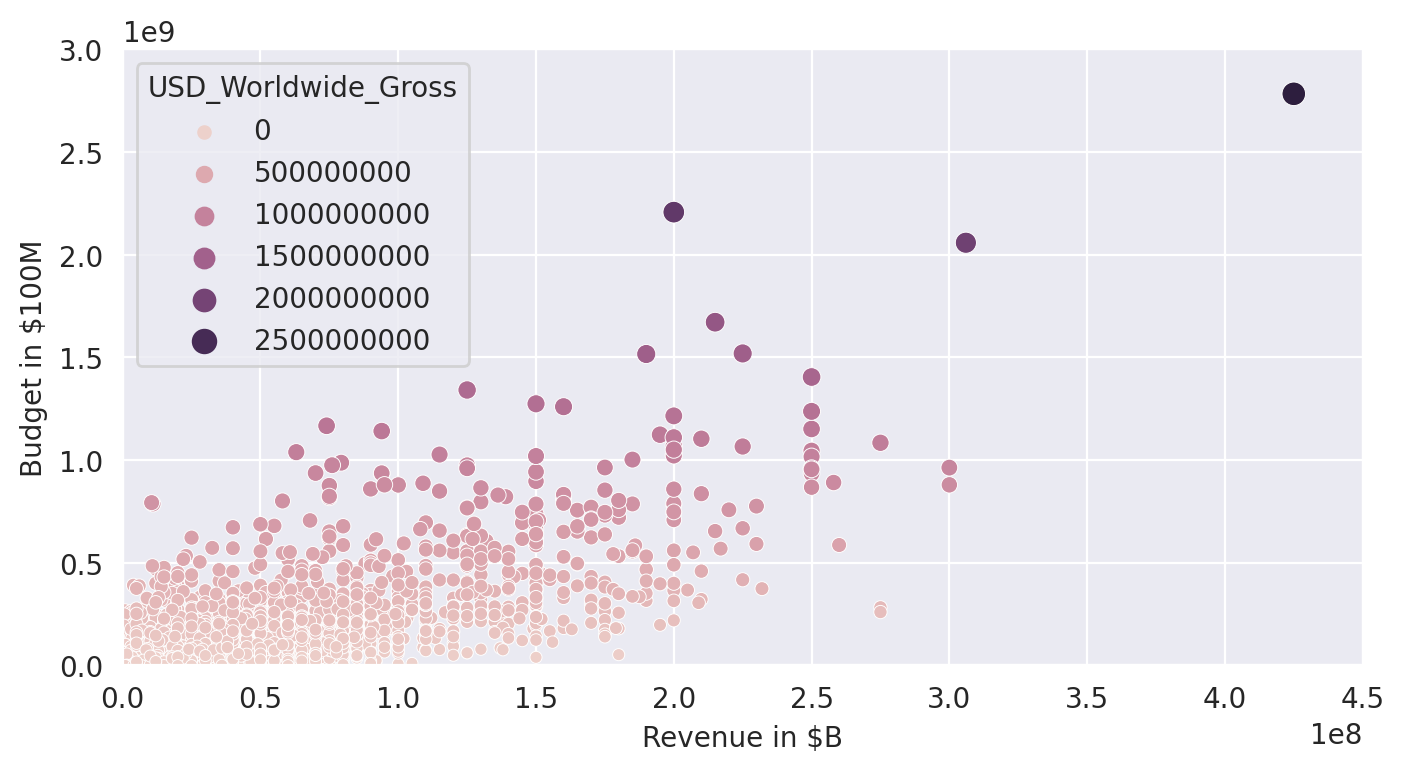

In [167]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
       ax = sns.scatterplot(x=clean_data.USD_Production_Budget,
                            y=clean_data.USD_Worldwide_Gross,
                            hue=clean_data.USD_Worldwide_Gross,
                            legend=True,
                            size=clean_data.USD_Worldwide_Gross)
ax.set(ylim= (0, 3000000000),
       xlim= (0, 450000000),
       xlabel= "Revenue in $B",
       ylabel= "Budget in $100M")
plt.show()

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



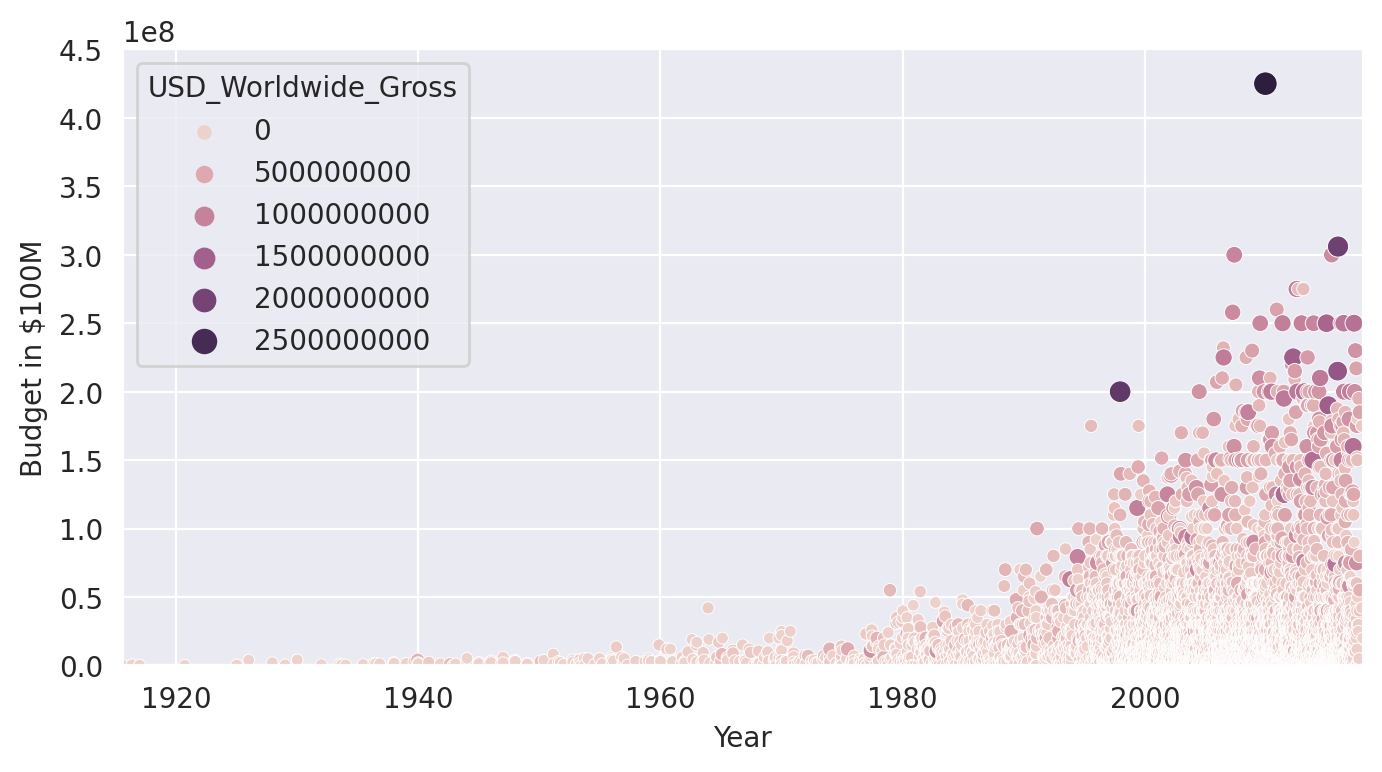

In [185]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
       ax1 = sns.scatterplot(data=clean_data,
                             x="Release_Date",
                             y="USD_Production_Budget",
                             hue="USD_Worldwide_Gross",
                             size="USD_Worldwide_Gross")

       ax1.set(xlim= (clean_data.Release_Date.min(), clean_data.Release_Date.max()),
               ylim=(0, 450000000),
               ylabel="Budget in $100M",
               xlabel= "Year")
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [219]:
dti = pd.DatetimeIndex(clean_data.Release_Date)
years = dti.year
decades = (years//10) * 10
clean_data["Decades"] = decades

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,20890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,218923174,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,544190539,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,4187674,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,61700686,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [225]:
old_films = clean_data[clean_data.Decades < 1970]
num_old_films = old_films.shape[0]
print(f"number of old films: {num_old_films}")

number of old films: 153


In [234]:
most_exp_old = old_films.Movie_Title[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()].values
print(f"The most expensive film made prior to 1970: {most_exp_old}")

The most expensive film made prior to 1970: ['Cleopatra']


In [249]:
new_films = clean_data[clean_data.Decades >= 1970]
num_new_films = new_films.shape[0]
new_films.USD_Worldwide_Gross.max()

2783918982

# Seaborn Regression Plots

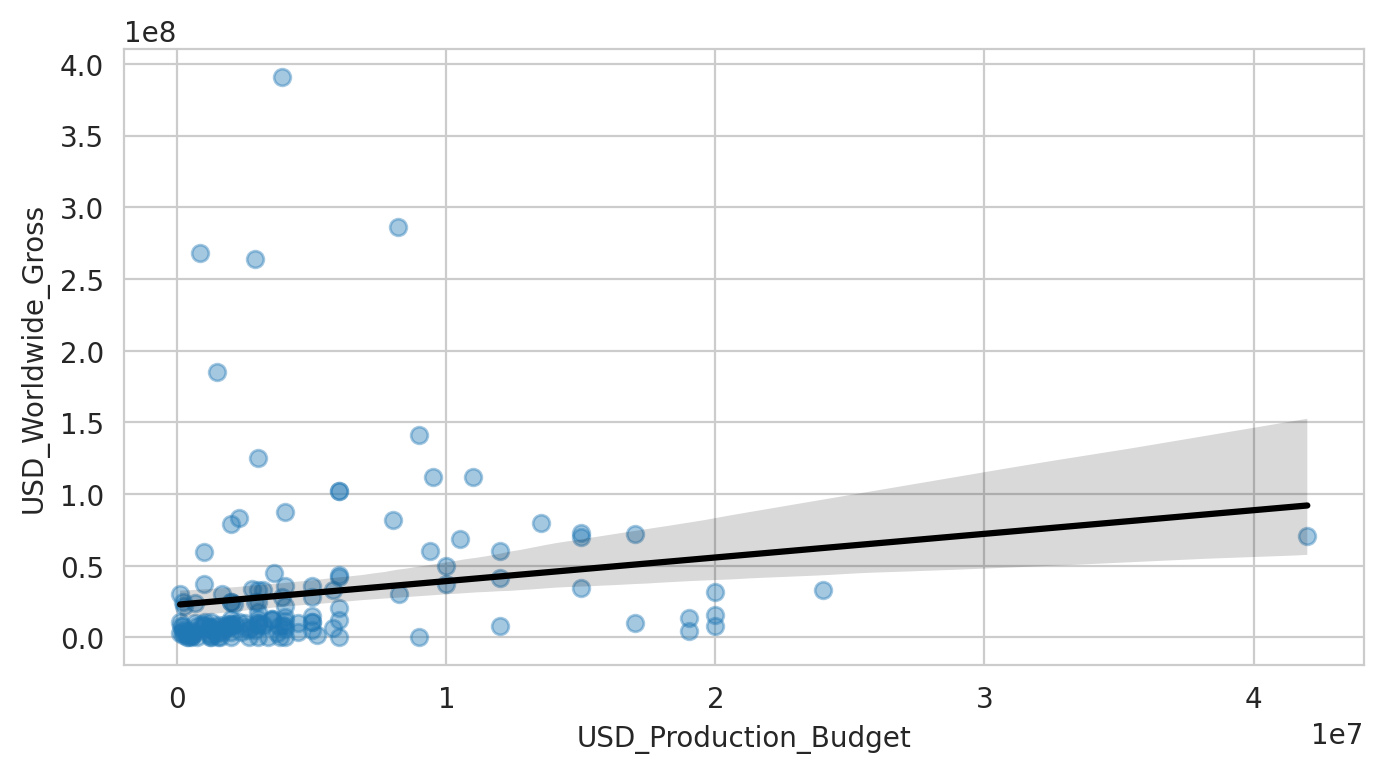

In [240]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    ax = sns.regplot(data=old_films,
                     x= "USD_Production_Budget",
                     y= "USD_Worldwide_Gross",
                     scatter_kws= {"alpha": 0.4},
                     line_kws= {"color": "black"})
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

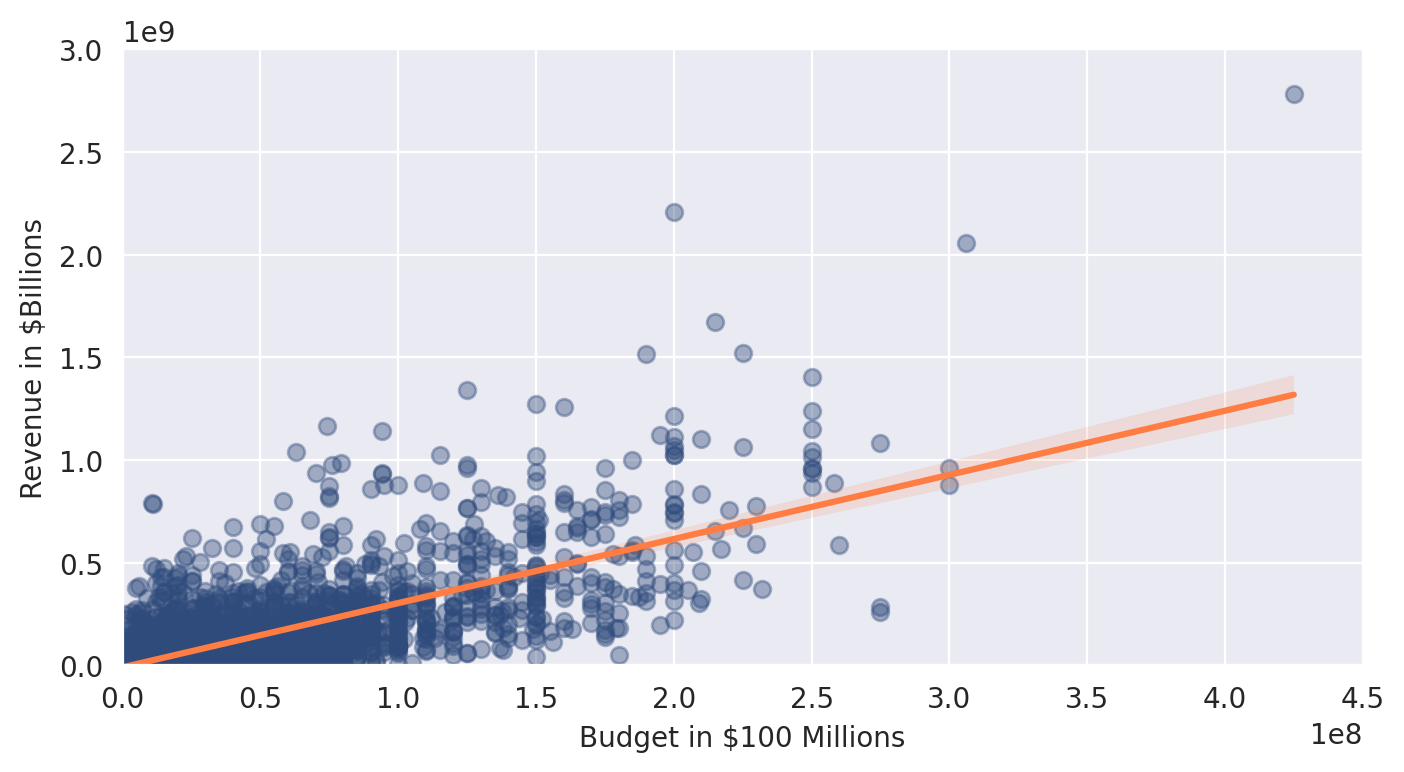

In [255]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax3 = sns.regplot(data=new_films,
                      x="USD_Production_Budget",
                      y="USD_Worldwide_Gross",
                      scatter_kws={"alpha": 0.4,
                                   "color": "#2f4b7c"},
                      line_kws={"color": "#ff7c43"})

ax3.set(xlabel="Budget in $100 Millions",
        ylabel="Revenue in $Billions",
        ylim=(0, 3000000000),
        xlim=(0, 450000000))
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [262]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
regression.fit(X, y)
# regression.intercept_
# regression.coef_
regression.score(X, y)

LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [267]:
X1 = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y1 = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
old_films_regression = LinearRegression()
old_films_regression.fit(X1, y1)

LinearRegression()

In [287]:
old_films_regression.intercept_[0]

22821538.635080386

In [289]:
old_films_regression.coef_[0][0]

1.6477131440107315

In [270]:
old_films_regression.score(X1, y1)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [290]:
theta_zero = old_films_regression.intercept_[0]
theta_one = old_films_regression.coef_[0][0]
budget = 350000000
est_revenue = theta_zero + theta_one * budget
est_revenue = round(est_revenue, -6)

In [291]:
print(f"The estimated revenue for a movie with the budget of $350 million: {est_revenue:.10}")

The estimated revenue for a movie with the budget of $350 million: 600000000.0


In [292]:
theta_one

1.6477131440107315

In [293]:
theta_zero

22821538.635080386